# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
data = pd.read_csv(data_url,index_col='ID')

In [0]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

# Exploatory Data Analysis

In [0]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

Observation: The features with 'object' data type are all categorical features which must be encoded to proceed

In [0]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

Observation: Checking for invalid entries in data.
There are no such invalid data entries (such as NaNs or infinity values).

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


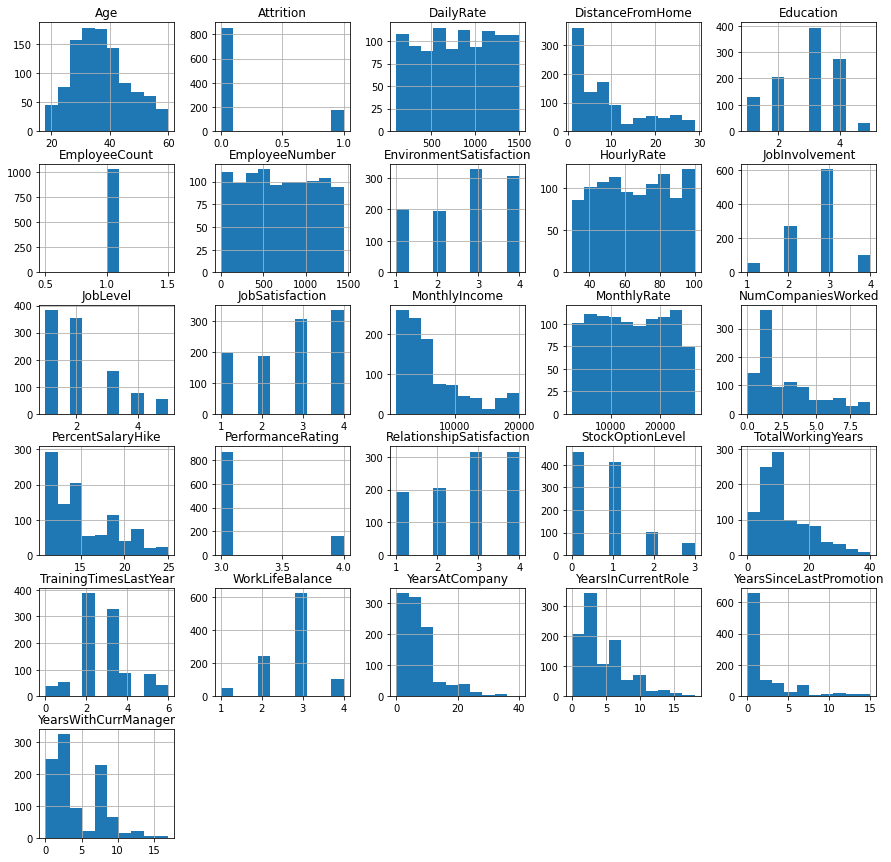

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plot1 = data.hist(figsize=(15,15))

Observation: We can drop EmployeeCount a it does not add anything significant for classification


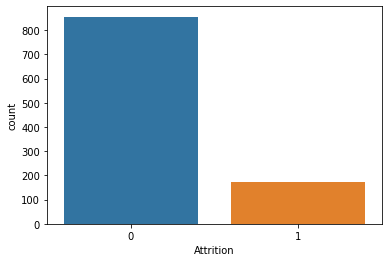

In [0]:
p1=sns.countplot(data.Attrition)

Observation: Data is imbalanced


In [0]:
# encoding categorical data
from sklearn import preprocessing
enc=preprocessing.LabelEncoder()

for col in data.select_dtypes(include='object').columns:
    data[col]=enc.fit_transform(data[col])


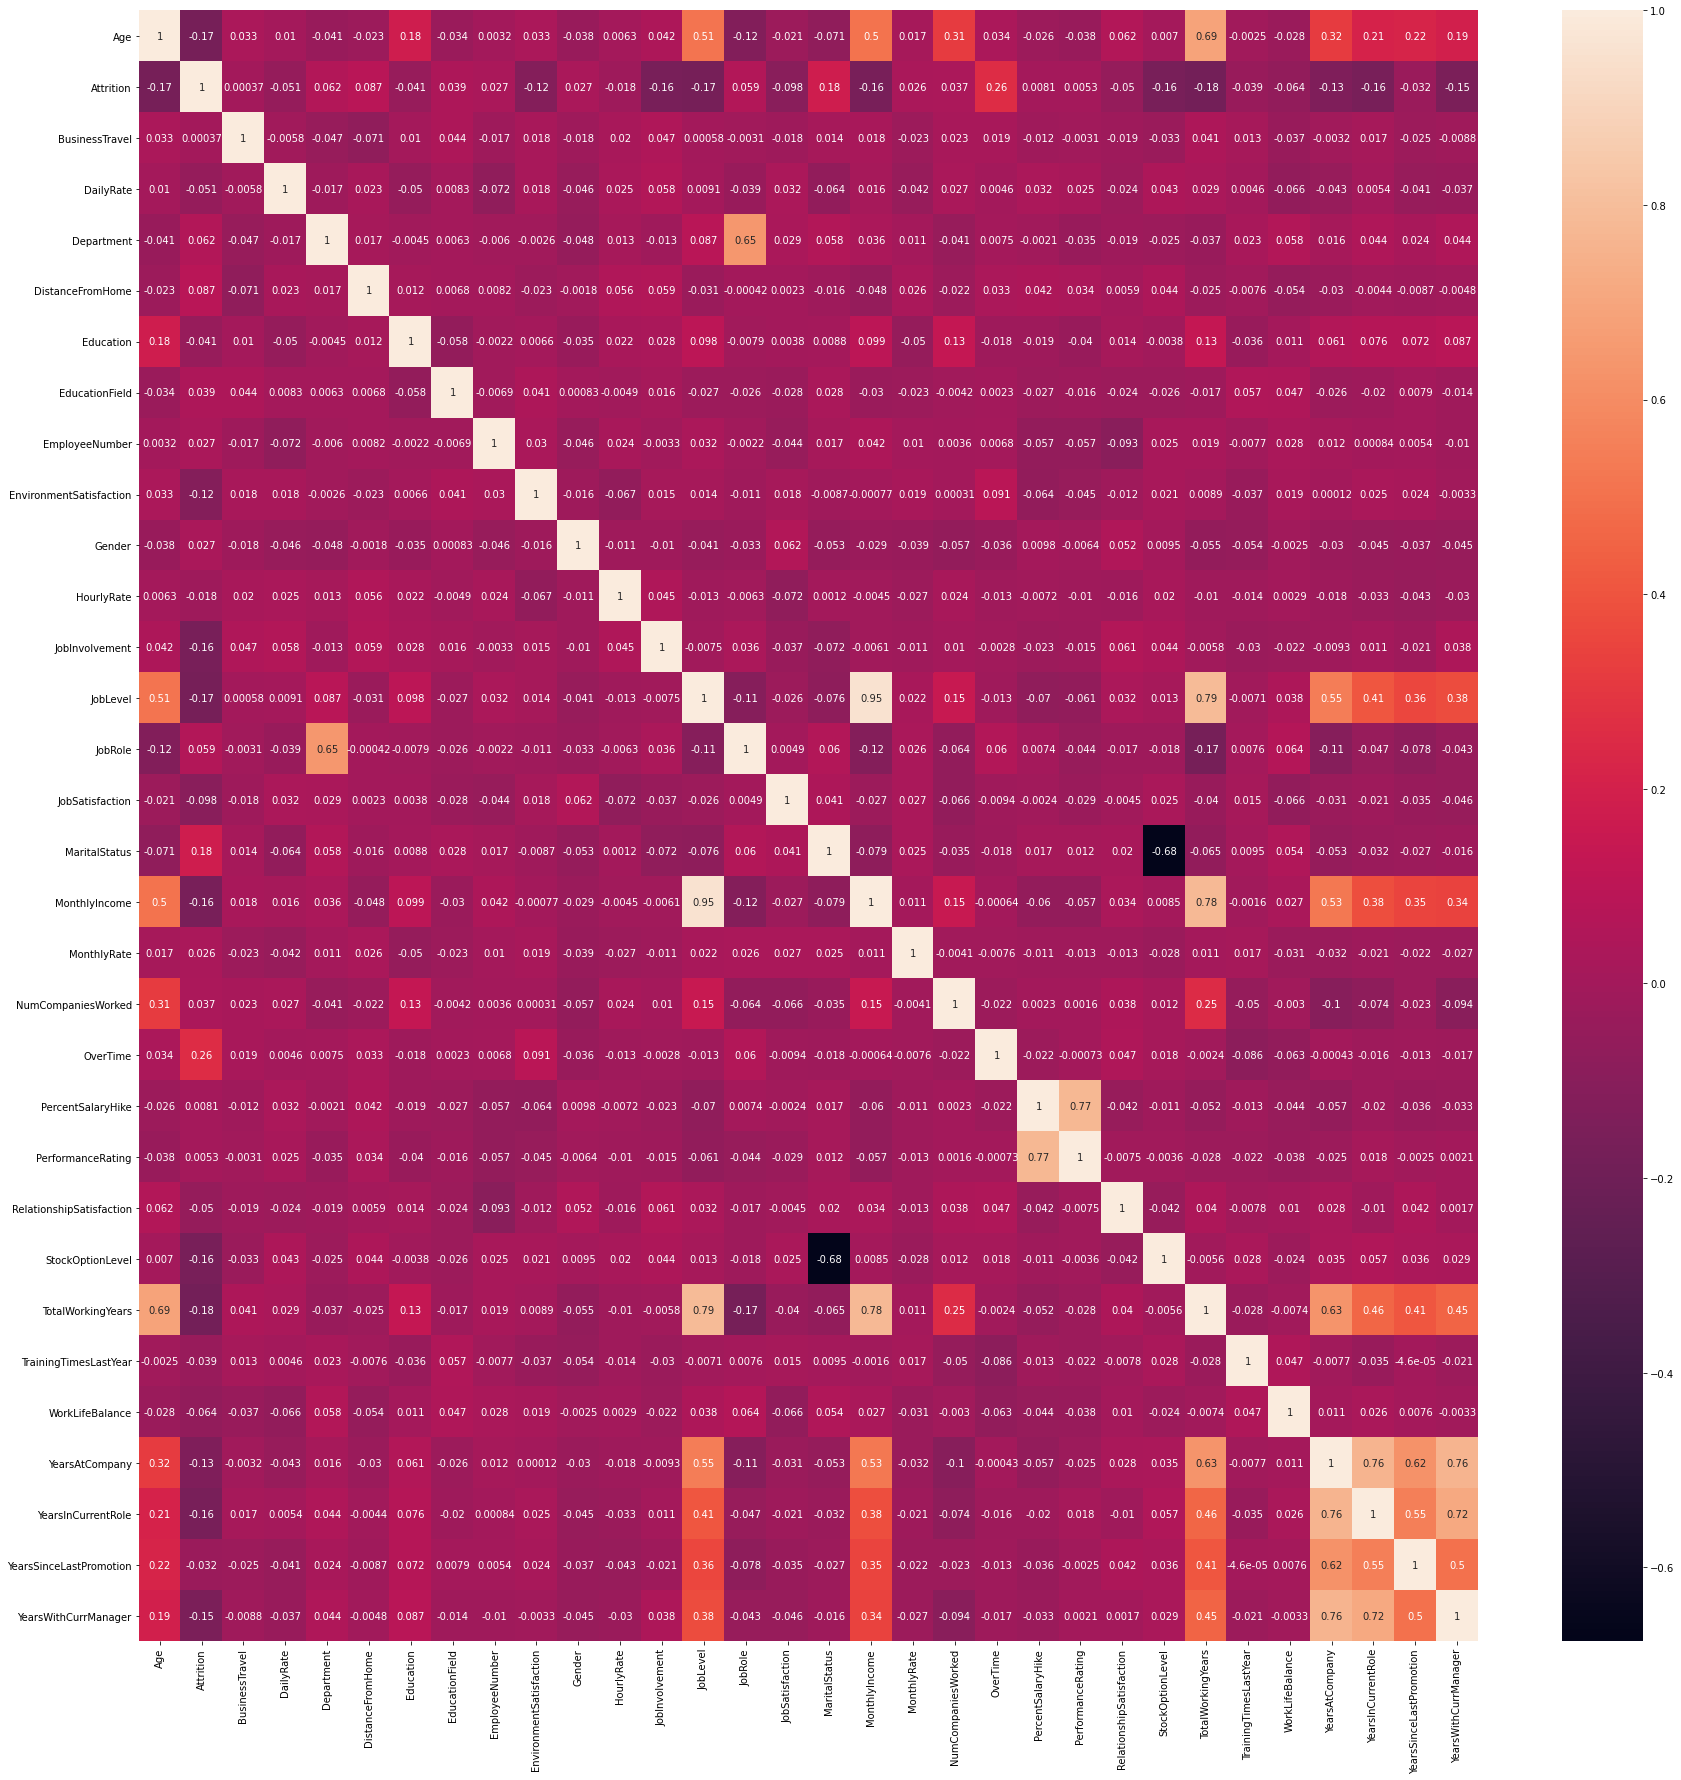

In [0]:
data_corr=data.drop(columns='EmployeeCount').corr()
plt.figure(figsize=(30,30))
p2=sns.heatmap(data_corr, annot=True)

Observation: Many features are correlated with other features
1. JobLevel and MonthlyIncome
2. JobLevel and TotalWorkingYears
3. MontlyIncome and TotalWorkingYears
4. PercentageSalaryHike and PerformanceRating
5. YearsAtCompany and YearsInCurrentRole
6. YearsAtCompany and YearsWithCurrentManager
7. YearsInCurrentRole and YearsWithCurrentManager

#Let's start with classification

In [0]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['EmployeeCount','EmployeeNumber','Attrition'])  ## Removing columns that doesn't contribute to classification and the labels too
y = data.Attrition  ## labels for classification

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.4, random_state=3) ## Randomly split data for training and validation

1. Random Forest Classifier

Train data score: 1.0
Test data score: 0.866504854368932
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       347
           1       0.81      0.20      0.32        65

    accuracy                           0.87       412
   macro avg       0.84      0.60      0.62       412
weighted avg       0.86      0.87      0.83       412

Area under ROC Curve = 0.8355131899800488


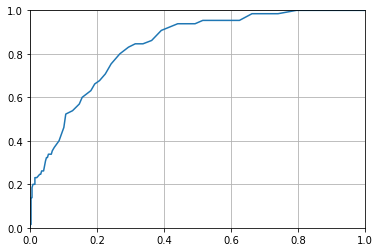

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
clf = RandomForestClassifier(n_estimators=100, random_state=3)
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_ts)
y_pred_score=clf.predict_proba(X_ts)[:,1]
print('Train data score: %s' %clf.score(X_tr,y_tr))
print('Test data score: %s' %clf.score(X_ts,y_ts))
print(classification_report(y_ts,y_pred))

fpr, tpr, _ = roc_curve(y_ts,y_pred_score)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)
print('Area under ROC Curve = %s'%auc(fpr,tpr))

Observations: 

1. The overall accuracy is found to be 87%.
2. Precision: This metric shows how reliable a correct classification is. Class 0 is classified with 81% precision and Class 1 is classified with 87% precision. So, the classification results are quite reliable.
3. Recall: This metric shows the fraction of data correctly classified from a class. So, the recall of class 0 is 99% and of class 1 is 20% owing to the imbalanced training data we train it with.
4. f1 score: The harmonic mean of precision and recall. Ideally, should be 1 for the best recall and precision. Here, we can observe that f1 scores of class 0 is 0.93 and class 1 is 0.32
5. Area under ROC curve is 0.8355 (Should be ideally 1 for the best classifier)

2. XGBoost Classifier

Train data score: 0.9561688311688312
Test data score: 0.866504854368932
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       347
           1       0.67      0.31      0.42        65

    accuracy                           0.87       412
   macro avg       0.77      0.64      0.67       412
weighted avg       0.85      0.87      0.85       412

Area under ROC Curve = 0.8403901573930393


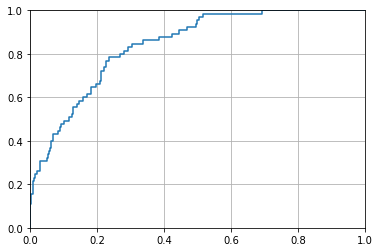

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
clf = XGBClassifier(n_estimators=100, random_state=3)
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_ts)
y_pred_score=clf.predict_proba(X_ts)[:,1]
print('Train data score: %s' %clf.score(X_tr,y_tr))
print('Test data score: %s' %clf.score(X_ts,y_ts))
print(classification_report(y_ts,y_pred))

fpr, tpr, _ = roc_curve(y_ts,y_pred_score)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)
print('Area under ROC Curve = %s'%auc(fpr,tpr))

Observations: 

1. The overall accuracy is found to be 87%.
2. Precision: Class 0 is classified with 88% precision and Class 1 is classified with 67% precision. So, the classification results for Class 0 are reliable. Class 1 is a little less compared to Random Forest Classifier
3. Recall: The recall of class 0 is 97% and of class 1 is 31%. Class 1 recall is better compared to Random Forest, and that of Class 0 remains more or less the same.
4. f1 scores of class 0 is 0.92 and class 1 is 0.42. The f1 score of Class 1 is doubled compared to the Random Forest Classifier. f1 score of Class 0 remains the same as RFC
5. Area under the ROC curve is 0.8404, slightly better than RFC


3. Adaboost Classifier

Train data score: 0.9204545454545454
Test data score: 0.8616504854368932
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       347
           1       0.57      0.48      0.52        65

    accuracy                           0.86       412
   macro avg       0.74      0.71      0.72       412
weighted avg       0.85      0.86      0.86       412

Area under ROC Curve = 0.8375083130126357


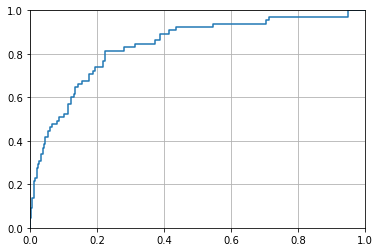

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
clf = AdaBoostClassifier(n_estimators=75, random_state=3)
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_ts)
y_pred_score=clf.predict_proba(X_ts)[:,1]
print('Train data score: %s' %clf.score(X_tr,y_tr))
print('Test data score: %s' %clf.score(X_ts,y_ts))
print(classification_report(y_ts,y_pred))

fpr, tpr, _ = roc_curve(y_ts,y_pred_score)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)
print('Area under ROC Curve = %s'%auc(fpr,tpr))

Observations: 

1. The overall accuracy is found to be 86%.
2. Precision: Class 0 is classified with 91% precision and Class 1 is classified with 57% precision. So, the classification results for Class 0 are reliable. Class 1 is a little less compared to RFC and XGB
3. Recall: The recall of class 0 is 93% and of class 1 is 48%. Class 1 recall is better than both RFC and XGB, and that of Class 0 remains more or less the same.
4. f1 scores of class 0 is 0.92 and class 1 is 0.52. The f1 score of Class 1 is improved compared to RFC and XGB. f1 score of Class 0 more or less the same of RFC and XGB
5. Area under the ROC curve is 0.8375, lies between RFC and XGB


## Conclusion:
1. RFC is reliable in terms of classification because of its high precision rates.
2. Adaboost provides good recall.
3. XGB is a better performer in terms of Area under curve of the ROC curve.